In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



In [5]:
x_val = np.array([0, np.pi/2, np.pi])

f = lambda x: np.sin(x)
y = f(x_val)

P = lagrange(x_val , y)

Pol = np.poly1d(P)

print(f' El polinomio de interpolación de Lagrange para el seno en x = {x_val} es: {Pol}')

 El polinomio de interpolación de Lagrange para el seno en x = [0.         1.57079633 3.14159265] es:          2
-0.4053 x + 1.273 x


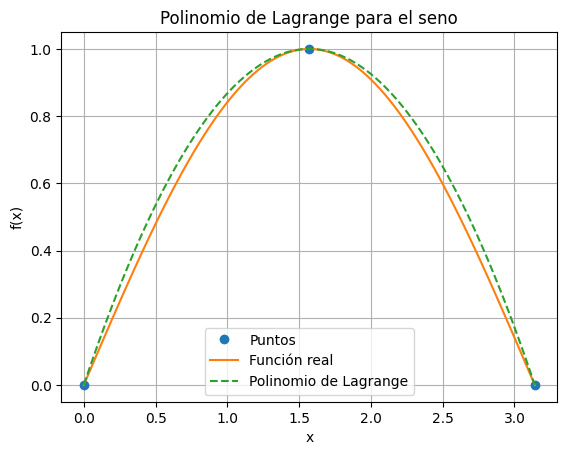

In [6]:
x_inter = np.linspace(min(x_val), max(x_val), 100)
y_inter = Pol(x_inter)

plt.plot(x_val, y, 'o', label='Puntos')
plt.plot(x_inter, np.sin(x_inter), label = 'Función real')
plt.plot(x_inter, y_inter, '--', label = 'Polinomio de Lagrange')
plt.title('Polinomio de Lagrange para el seno')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

In [7]:
def error_lagrange(x_vals, fn):
  x = sp.symbols('x')
  n = len(x_vals)
  df = sp.diff(fn, x, n)
  df = sp.lambdify(x, df)

  x_inter = np.linspace(min(x_vals), max(x_vals), 100)

  error = np.zeros(len(x_inter))

  for j in range(len(x_inter)):

    prod = 1

    for i in range(n):

      prod *= (x_inter[j] - x_vals[i])

    error[j] = 1 / mt.factorial(n+1) * df(x_inter[j]) * prod

  return error

x = sp.symbols('x')
f1 = sp.sin(x)

error = error_lagrange(x_val, f1)
error1 = f(x_inter) - P(x_inter)

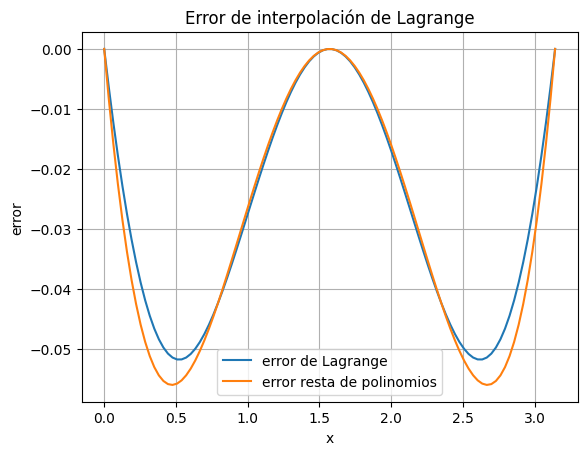

In [8]:
plt.plot(x_inter, error, label = 'error de Lagrange')
plt.plot(x_inter, error1, label = 'error resta de polinomios')
plt.legend()
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error de interpolación de Lagrange')
plt.grid()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [9]:
from scipy.interpolate import CubicHermiteSpline

Text(0.5, 1.0, 'Polinomio de Hermite para el Seno')

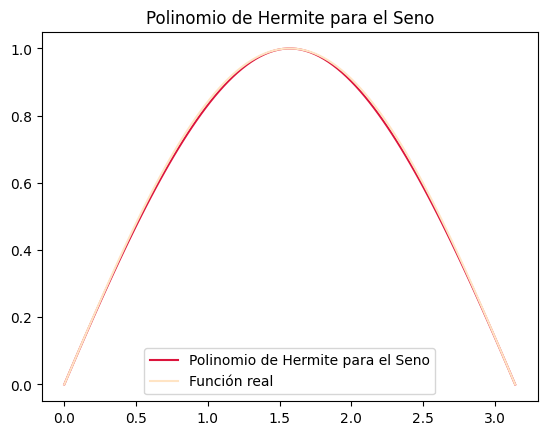

In [10]:
diff = sp.diff(sp.sin(x), x)
diff = sp.lambdify(x, diff)
diff = diff(x_val)

Hermite = CubicHermiteSpline(x_val, y, diff)
Hermite1 = Hermite(x_inter)

plt.plot(x_inter, Hermite1, color = 'crimson', label = 'Polinomio de Hermite para el Seno')
plt.plot(x_inter, np.sin(x_inter), color = 'bisque', label = 'Función real')
plt.legend()
plt.title('Polinomio de Hermite para el Seno')

In [11]:
def Error_hermite(x_vals, fn):
  x = sp.symbols('x')
  n = len(x_vals)
  df_n = sp.diff(fn, x, 2 * n + 2)
  df_n = sp.lambdify(x, df_n, 'numpy')

  x_inter_ = np.linspace(min(x_vals), max(x_vals), 100)

  error = np.zeros(len(x_inter_))

  for j in range(len(x_inter_)):

    diferencias = 1

    for i in range(n):

      diferencias *= (x_inter_[j] - x_vals[i]) ** 2

    error[j] = 1 / mt.factorial(2 * n + 2) * df_n(x_inter_[j]) * diferencias

  return error

error_h = Error_hermite(x_val, f1)
error_h1 = f(x_inter) - Hermite1

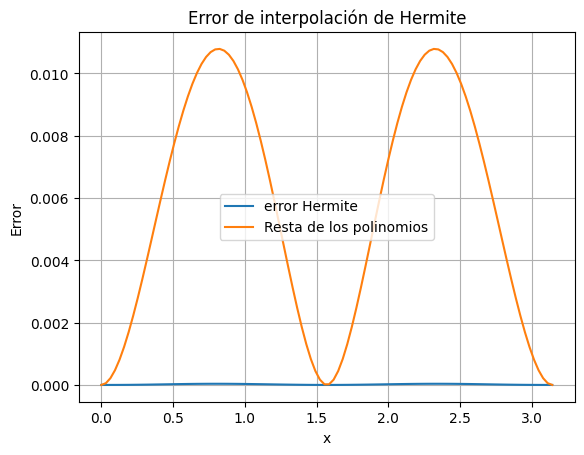

In [12]:
plt.plot(x_inter, error_h, label = 'error Hermite')
plt.plot(x_inter, error_h1, label = 'Resta de los polinomios')
plt.legend()
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de interpolación de Hermite')
plt.grid()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [13]:
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
Er , Gamma = 78, 55

def Breit_Wigner(Sigma0, E, Er, Gamma):
  return Sigma0 / ((E - Er) ** 2 + ((Gamma ** 2) / 4))

Sigma0 = Breit_Wigner(1, 0, Er, Gamma)

Sigma_val = Breit_Wigner(Sigma0, Energia, Er, Gamma)

Sigma_val

array([2.13725357e-08, 4.10051152e-08, 9.49154274e-08, 1.91040166e-07,
       1.17874208e-07, 4.93022467e-08, 2.46106624e-08, 1.43816913e-08,
       9.34726025e-09])

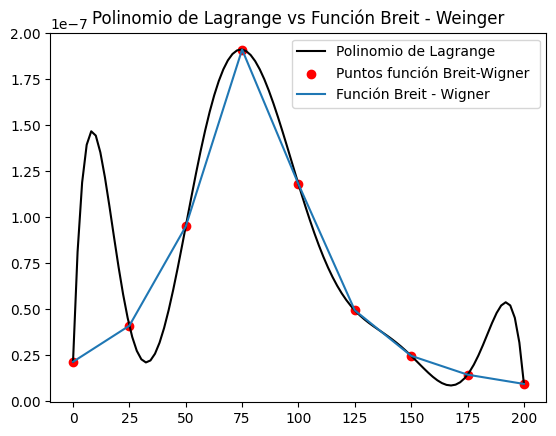

In [14]:
P = lagrange(Energia , Sigma_val)
x_val = np.linspace(min(Energia), max(Energia), 100)
y_val = P(x_val)

plt.plot(x_val, y_val, color = 'black', label = 'Polinomio de Lagrange')
plt.scatter(Energia, Sigma_val, color = 'red', label = 'Puntos función Breit-Wigner ')
plt.plot(Energia, Sigma_val, label = 'Función Breit - Wigner')
plt.title('Polinomio de Lagrange vs Función Breit - Weinger')
plt.legend()
plt.show()

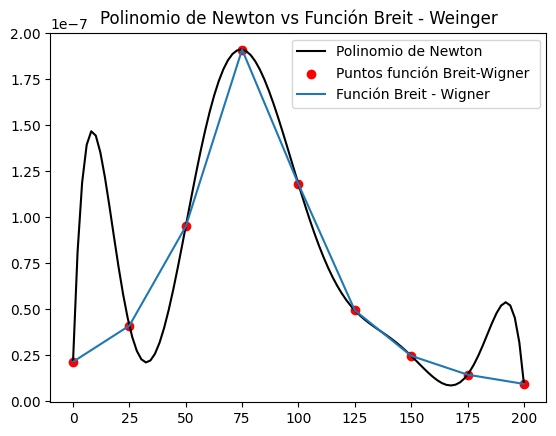

In [15]:
from scipy.interpolate import BarycentricInterpolator # Newton

Newton = BarycentricInterpolator(Energia, Sigma_val)
y = Newton(x_val)

plt.plot(x_val, y, color = 'k', label = 'Polinomio de Newton')
plt.scatter(Energia, Sigma_val, color = 'red', label = 'Puntos función Breit-Wigner ')
plt.plot(Energia, Sigma_val, label = 'Función Breit - Wigner')
plt.title('Polinomio de Newton vs Función Breit - Weinger')
plt.legend()
plt.show()

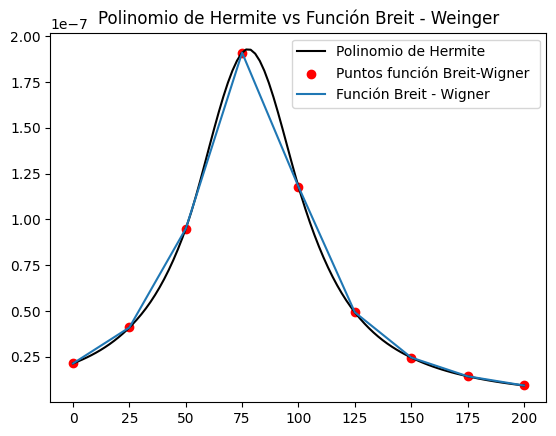

In [16]:
from scipy.interpolate import CubicHermiteSpline #Hermite

E = sp.symbols('E')

Sigma = Sigma0 / ((E - Er) ** 2 + ((Gamma ** 2) / 4))
derivada = sp.diff(Sigma, E)

Sigma_ = sp.lambdify(E, Sigma)
derivada = sp.lambdify(E, derivada)

derivada = derivada(Energia)

Hermite = CubicHermiteSpline(Energia, Sigma_val, derivada)

y_ = Hermite(x_val)

plt.plot(x_val, y_, color = 'k', label = 'Polinomio de Hermite')
plt.scatter(Energia, Sigma_val, color = 'red', label = 'Puntos función Breit-Wigner ')
plt.plot(Energia, Sigma_val, label = 'Función Breit - Wigner')
plt.title('Polinomio de Hermite vs Función Breit - Weinger')
plt.legend()
plt.show()

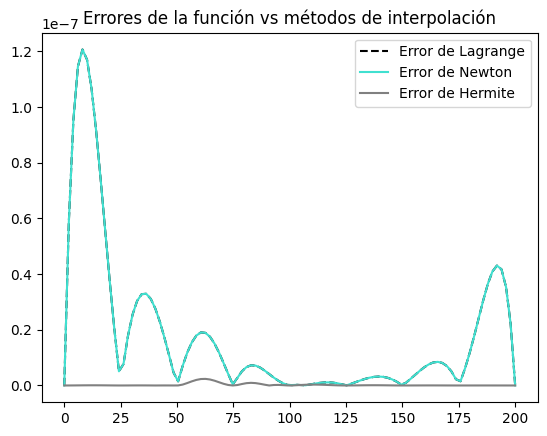

In [17]:
Sigma_val = Breit_Wigner(Sigma0, x_val, Er, Gamma)

plt.plot(x_val, abs(Sigma_val - y_val), '--', label = 'Error de Lagrange', color = 'k')
plt.plot(x_val, abs(Sigma_val - y), label = 'Error de Newton', color = 'turquoise')
plt.plot(x_val, abs(Sigma_val - y_), label = 'Error de Hermite', color = 'gray')
plt.legend()
plt.title('Errores de la función vs métodos de interpolación')
plt.show()

Se observa, igual que en las gráficas de cada método de interpolación, que el error que presenta el error de Lagrange es igual que el de Newton, y que el error de interpolación del polinomio de Hermite es el menor de los tres métodos.

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

In [18]:
x = sp.symbols('x')
f_ = 1 / (1 + 25 * x ** 2)
f = sp.lambdify(x, f_)

df = sp.diff(f_ , x)
df_ = sp.lambdify(x, df)

inter = np.linspace(-1, 1, 100)

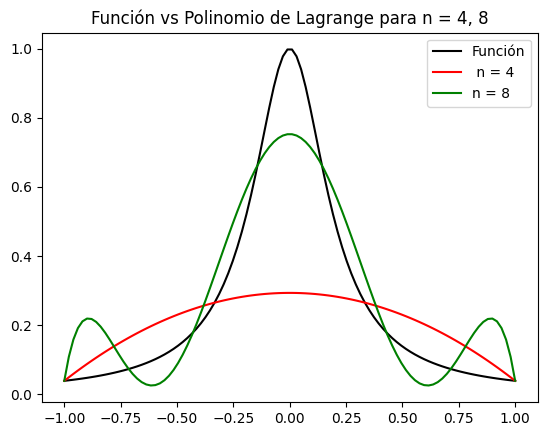

In [19]:
x = []
y = []
P = []
H = []
for i in range(4, 21, 4):

    x_ = np.linspace(-1 , 1, i)
    y_ = f(x_)

    x.append(x_)
    y.append(y_)

for i in range(len(x)):

  P.append(lagrange(x[i], y[i]))
  H.append(CubicHermiteSpline(x[i], y[i], df_(x[i])))

plt.plot(inter, f(inter), color = 'black', label = 'Función')
plt.plot(inter, P[0](inter), color = 'red', label = ' n = 4')
plt.plot(inter, P[1](inter), color = 'green', label = 'n = 8')
plt.legend()
plt.title('Función vs Polinomio de Lagrange para n = 4, 8')
plt.show()

Text(0.5, 1.0, 'Función vs Polinomio de Lagrange para n = 12, 16, 20')

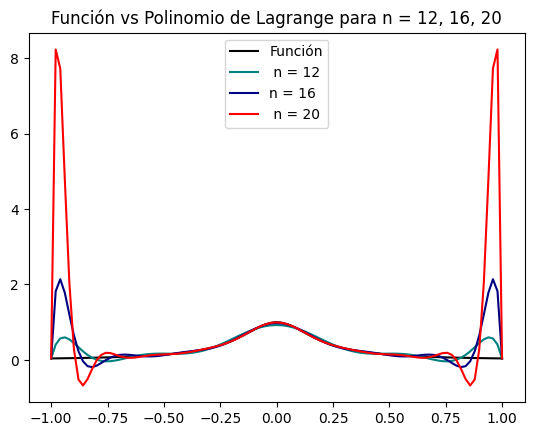

In [20]:
plt.plot(inter, f(inter), color = 'black', label = 'Función')
plt.plot(inter, P[2](inter), color = 'teal', label = ' n = 12')
plt.plot(inter, P[3](inter), color = 'navy', label = 'n = 16')
plt.plot(inter, P[4](inter), color = 'red', label = ' n = 20')
plt.legend()
plt.title('Función vs Polinomio de Lagrange para n = 12, 16, 20')

Text(0, 0.5, 'Error')

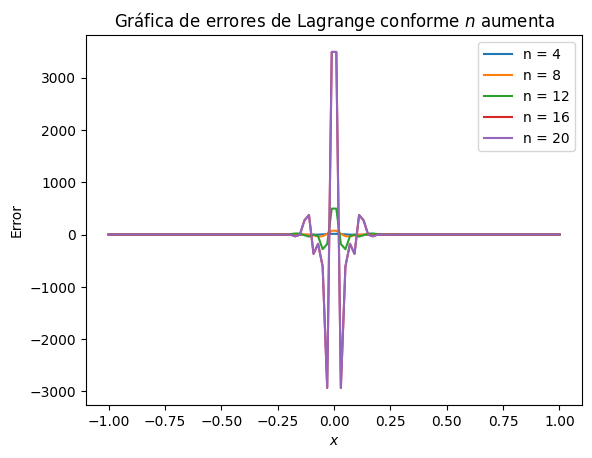

In [21]:
plt.plot(inter, error_lagrange(x[0], f_), label = 'n = 4')
plt.plot(inter, error_lagrange(x[1], f_), label = 'n = 8')
plt.plot(inter, error_lagrange(x[2], f_), label = 'n = 12')
plt.plot(inter, error_lagrange(x[3], f_), label = 'n = 16')
plt.plot(inter, error_lagrange(x[3], f_), label = 'n = 20')
plt.legend()
plt.title('Gráfica de errores de Lagrange conforme $n$ aumenta')
plt.xlabel('$x$')
plt.ylabel('Error')

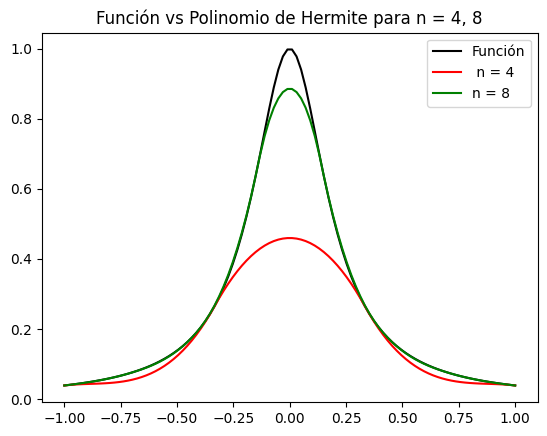

In [22]:
plt.plot(inter, f(inter), color = 'black', label = 'Función')
plt.plot(inter, H[0](inter), color = 'red', label = ' n = 4')
plt.plot(inter, H[1](inter), color = 'green', label = 'n = 8')
plt.legend()
plt.title('Función vs Polinomio de Hermite para n = 4, 8')
plt.show()

Text(0.5, 1.0, 'Función vs Polinomio de Hermite para n = 12, 16, 20')

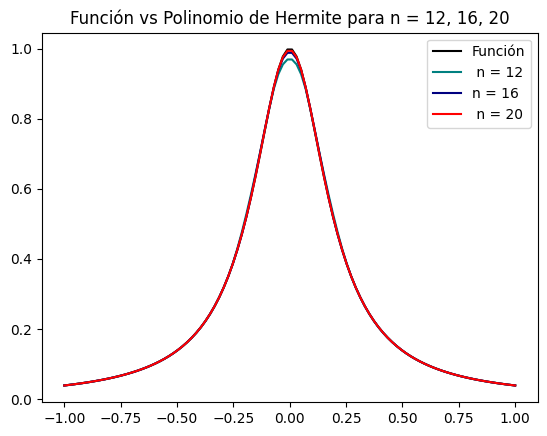

In [23]:
plt.plot(inter, f(inter), color = 'black', label = 'Función')
plt.plot(inter, H[2](inter), color = 'teal', label = ' n = 12')
plt.plot(inter, H[3](inter), color = 'navy', label = 'n = 16')
plt.plot(inter, H[4](inter), color = 'red', label = ' n = 20')
plt.legend()
plt.title('Función vs Polinomio de Hermite para n = 12, 16, 20')

# Se observa que a medida que los $n$ crecen en la interpolación de Hermite, se acercan cada vez más a la función original, a diferencia de la interpolación de Lagrange, veamos cómo varía el error con esta interpolación.


Text(0, 0.5, 'Error')

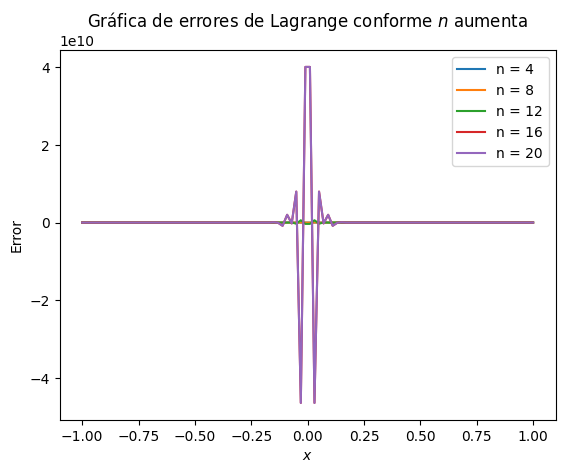

In [24]:
plt.plot(inter, Error_hermite(x[0], f_), label = 'n = 4')
plt.plot(inter, Error_hermite(x[1], f_), label = 'n = 8')
plt.plot(inter, Error_hermite(x[2], f_), label = 'n = 12')
plt.plot(inter, Error_hermite(x[3], f_), label = 'n = 16')
plt.plot(inter, Error_hermite(x[3], f_), label = 'n = 20')
plt.legend()
plt.title('Gráfica de errores de Lagrange conforme $n$ aumenta')
plt.xlabel('$x$')
plt.ylabel('Error')

# Vemos que, de igual forma, el error en la interpolación de Hermite, se vuelve máximo cuando $n = 20$, lo cual no me queda del todo claro ya que vimos que cuando $n$ alcanza este valor, la función y la interpolación son casi iguales. Tampoco queda claro por qué el error puede disminuir más de 0. Cómo se interpreta un error negativo?

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



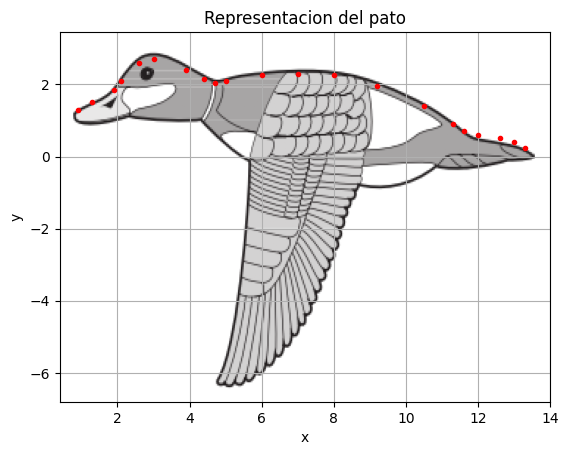

In [25]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [38]:
diff = np.gradient(xp)

Text(0.5, 1.0, 'Puntos del dibujo del pato e Interpolación de Lagrange, Hermite y Splines')

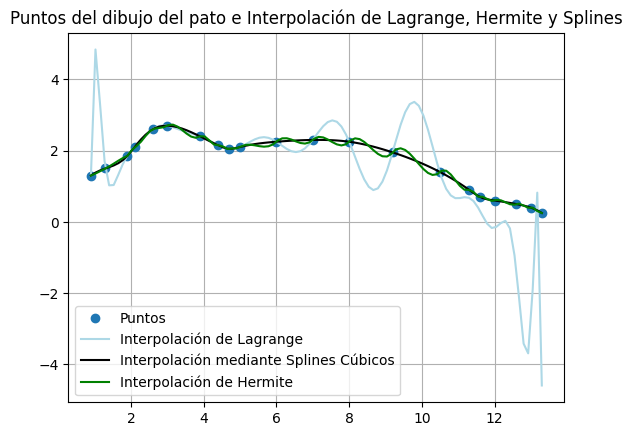

In [39]:
interpolacion = np.linspace(min(xp), max(xp), 100)

P_ = lagrange(xp, yp)
H_ = CubicHermiteSpline(xp, yp, diff)
CS = CubicSpline(xp, yp)

plt.plot(xp, yp, 'o', label = 'Puntos')
plt.plot(interpolacion, P_(interpolacion), color = 'lightblue', label = 'Interpolación de Lagrange')
plt.plot(interpolacion, CS(interpolacion), color = 'k', label = 'Interpolación mediante Splines Cúbicos')
plt.plot(interpolacion, H_(interpolacion), color = 'green', label = 'Interpolación de Hermite')
plt.legend()
plt.grid()
plt.title('Puntos del dibujo del pato e Interpolación de Lagrange, Hermite y Splines')

# Claramente el polinomio de Lagrange presentó oscilaciones entre los puntos, esto debido a la Condición de Runge que menciona, entre otras cosas, que el polinomio de Lagrange usándose para interpolar un conjunto de puntos distribuidos no uniformemente (como lo es en este caso) puede presentar fluctuaciones, que son más pronunciadas a su vez en los extremos del intervalo de interpolación (como se ha visto en casi todos los ejercicios de esta actividad). Por último, la cantidad de puntos por interpolar es un tanto grande, lo que hace que dicho polinomio deba ser de un grado mayor, provocando también fluctuaciones. En conclusión, el polinomio de Lagrange (y la mayoría de métodos de interpolación) funciona de manera efectiva en ciertos casos.

# La interpolación usando el polinomio de Hermite también presentó oscilaciones pero de una magnitud menor que la anteriormente mencionada.
